In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

home_dir = os.path.abspath(os.path.join('..'))
sys.path.append(home_dir)
# if module_path not in sys.path:
# 	sys.path.append(module_path+"\\Common_Module")
from lib.utils import *
from lib.propagator import *

%load_ext autoreload
%autoreload 2

In [ ]:
w = 0.011 # source half width (m)
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval

x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1
X1, Y1 = np.meshgrid(x1, y1)

u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
wavelength = 500e-9 # wavelength (m)
z = 2000        # propagation distance (m)

u2, L2 = FraunhoferProp(u1, L1, wavelength, z)
dx2 = L2/M
x2 = np.linspace(-L2/2, L2/2 - dx2, num=M, endpoint=True)
y2 = x2
wz = wavelength*z

I2 = np.abs(u2**2)
I2a = (4*w**2)**2/wz**2 * np.sinc(2*w*x2/wz)**2 * np.sinc(2*w*y2/wz)**2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax = axes.ravel()

Nf = w**2 / (wavelength*z)

ax[0].imshow(np.power(I2, 1/3), extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[0].axis('equal')
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*50))
ax[0].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*50))
# # ax.set_xticklabels(x_label_list)
ax[0].set_ylabel('m')
ax[0].set_xlabel('m')
ax[0].set_title(f'z = {z} m')

ax[1].plot(x2, I2[int(M/2-1), :], 'ro', markersize=0.5)
ax[1].plot(x2, I2a, 'b-', markersize=0.5)
ax[1].set_ylabel('Irradiance')
ax[1].set_xlabel('m')
ax[1].set_title(f'z = {z} m')
plt.show()

### 5.3 Square beam example

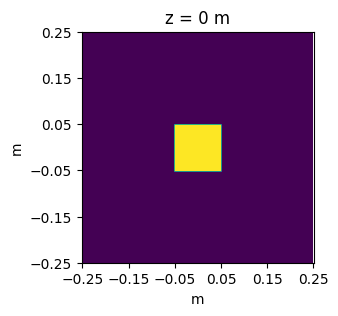

In [24]:
# square beam propagation example
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500e-9
k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)
z = 2000        # propagation distance (m)

X1, Y1 = np.meshgrid(x1, y1)
u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
I1 = np.abs(u1**2)                      # source irradiance

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
# ax = axes.ravel()

axes.imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
axes.axis('equal')
axes.set_xlabel('m')
axes.set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
# ax.set_xticklabels(x_label_list)
axes.set_ylabel('m')
axes.set_title('z = 0 m')
plt.show()

#### transfer function propagation method

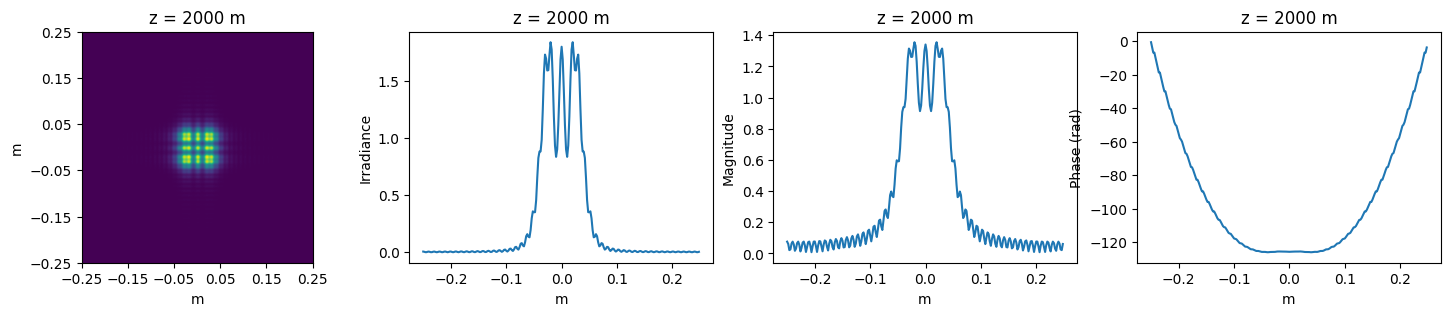

In [108]:
u2 = FresnelpropTF(u1, L1, wavelength, z) # propagation

x2 = x1 # observation coordinates
y2 = y1
I2 = np.abs(u2**2)  # observation irradiance

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
ax = axes.ravel()

ax[0].imshow(I2, extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[0].set_ylabel('m')
ax[0].set_title(f'z = {z} m')

ax[1].plot(x2, I2[int(M/2+1), :])
ax[1].set_xlabel('m')
ax[1].set_ylabel('Irradiance')
ax[1].set_title(f'z = {z} m')

ax[2].plot(x2, np.abs(u2[int(M/2+1), :]))
ax[2].set_xlabel('m')
ax[2].set_ylabel('Magnitude')
ax[2].set_title(f'z = {z} m')

ax[3].plot(x2, np.unwrap(np.angle(u2[int(M/2+1), :])))
ax[3].set_xlabel('m')
ax[3].set_ylabel('Phase (rad)')
# ax[3].set_ylim([-np.pi, np.pi])
ax[3].set_title(f'z = {z} m')

# plt.axis('equal')
plt.show()

#### impulse response propagation method

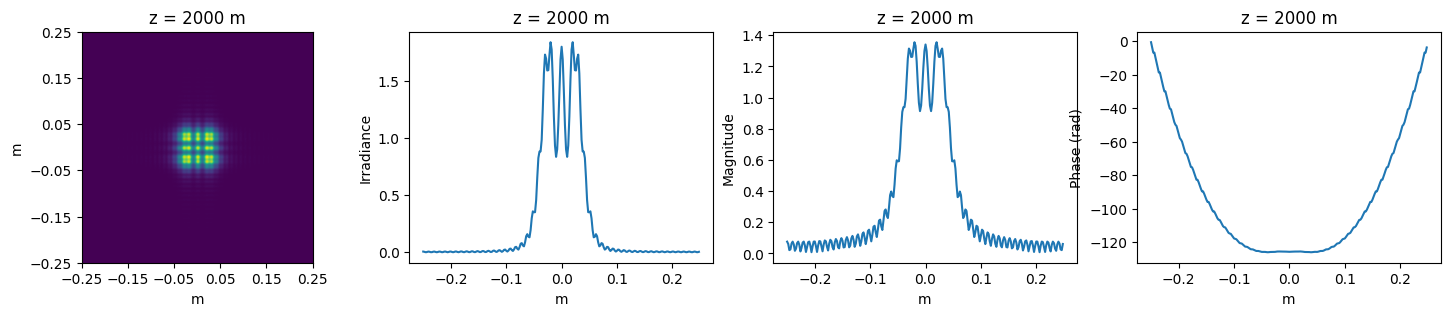

In [106]:
u2 = FresnelpropIR(u1, L1, wavelength, z) # propagation

x2 = x1 # observation coordinates
y2 = y1
I2 = np.abs(u2**2)  # observation irradiance

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
ax = axes.ravel()

ax[0].imshow(I2, extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[0].set_ylabel('m')
ax[0].set_title(f'z = {z} m')

ax[1].plot(x2, I2[int(M/2+1), :])
ax[1].set_xlabel('m')
ax[1].set_ylabel('Irradiance')
ax[1].set_title(f'z = {z} m')

ax[2].plot(x2, np.abs(u2[int(M/2+1), :]))
ax[2].set_xlabel('m')
ax[2].set_ylabel('Magnitude')
ax[2].set_title(f'z = {z} m')

ax[3].plot(x2, np.unwrap(np.angle(u2[int(M/2+1), :])))
ax[3].set_xlabel('m')
ax[3].set_ylabel('Phase (rad)')
# ax[3].set_ylim([-np.pi, np.pi])
ax[3].set_title(f'z = {z} m')

# plt.axis('equal')
plt.show()

#### Fraunhofer propagation

In [ ]:
# square beam propagation example

y1 = x1

k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)

u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
I1 = np.abs(u1**2)                      # source irradiance

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
# ax = axes.ravel()

axes.imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
axes.axis('equal')
axes.set_xlabel('m')
axes.set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
# ax.set_xticklabels(x_label_list)
axes.set_ylabel('m')
axes.set_title('z = 0 m')
plt.show()

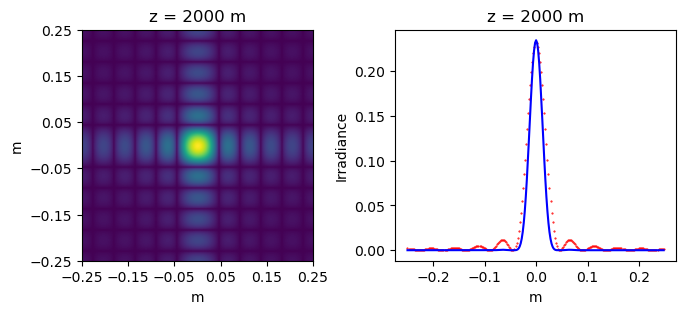

In [37]:
w = 0.011 # source half width (m)
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval

x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1
X1, Y1 = np.meshgrid(x1, y1)

u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
wavelength = 500e-9 # wavelength (m)
z = 2000        # propagation distance (m)

u2, L2 = FraunhoferProp(u1, L1, wavelength, z)
dx2 = L2/M
x2 = np.linspace(-L2/2, L2/2 - dx2, num=M, endpoint=True)
y2 = x2
wz = wavelength*z

I2 = np.abs(u2**2)
I2a = (4*w**2)**2/wz**2 * np.sinc(2*w*x2/wz)**2 * np.sinc(2*w*y2/wz)**2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax = axes.ravel()

Nf = w**2 / (wavelength*z)

ax[0].imshow(np.power(I2, 1/3), extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[0].axis('equal')
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*50))
ax[0].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*50))
# # ax.set_xticklabels(x_label_list)
ax[0].set_ylabel('m')
ax[0].set_xlabel('m')
ax[0].set_title(f'z = {z} m')

ax[1].plot(x2, I2[int(M/2-1), :], 'ro', markersize=0.5)
ax[1].plot(x2, I2a, 'b-', markersize=0.5)
ax[1].set_ylabel('Irradiance')
ax[1].set_xlabel('m')
ax[1].set_title(f'z = {z} m')
plt.show()

#### 5.7 Exercise

##### 5.1

L1 : 0.5 m 
dx1 : 0.001m 
fN : 500.0 cycles/m
B1 : 100.0 cycles/m 
fN : 500.0 
B1 < fN True 
dn : 100.0 samples
Fresnel number : 5.000000000000001 
Nf < 1 False but  acceptable for this simple aperture


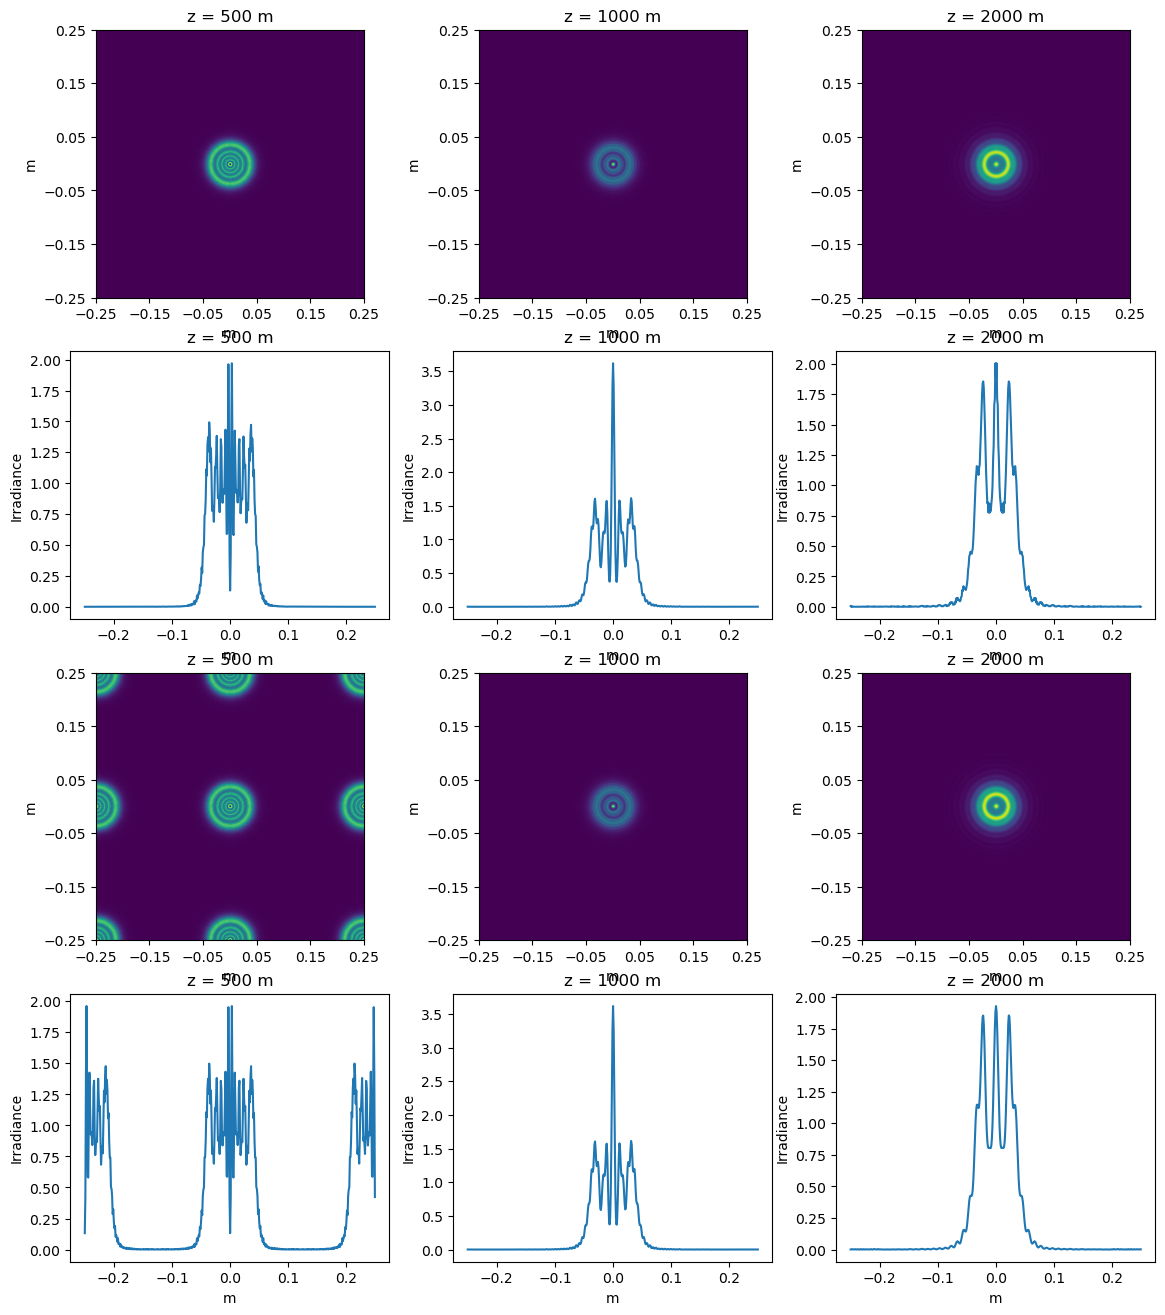

In [35]:
w = 0.05 # aperture radius (m)
wavelength = 500e-9 # wavelength (m)
z = 1000 # propagation distance (m)
M = 500 # array size of x, y axis

L1 = np.sqrt(M*wavelength*z) # side length L1 (m)
dx1 = L1 / M # sample interval (m)
fN = 1 / (2*dx1) # Nyquist frequency (cycles / m)
print(f'L1 : {L1} m \ndx1 : {dx1}m \nfN : {fN} cycles/m') 

B1 = 5 / w # effective bandwidth (cycles / m)
dn = 2*w / dx1 # sample No. spans the aperture diameter 
print(f'B1 : {B1} cycles/m \nfN : {fN} \nB1 < fN {B1 < fN} \ndn : {dn} samples')

Nf = FresnelNumber(w, wavelength, z) # Fresnel number
print(f'Fresnel number : {Nf} \nNf < 1 {Nf < 1} but  acceptable for this simple aperture')

# square beam propagation example
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1
k = 2*np.pi / wavelength    # wavenumber

X1, Y1 = np.meshgrid(x1, y1)
u1 = circle_func(X1, Y1, w)  # source field

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 16))
ax = axes.ravel()

for idx, z_dist in enumerate([500, 1000, 2000, 500, 1000, 2000]):
    if idx < 3:
        u2 = FresnelpropTF(u1, L1, wavelength, z_dist) # propagation
    else:
        u2 = FresnelpropIR(u1, L1, wavelength, z_dist) # propagation
    x2 = x1 # observation coordinates
    y2 = y1
    I2 = np.abs(u2**2)  # observation irradiance

    ax[idx + 3*(idx//3)].imshow(I2, extent=(-L1/2, L1/2, -L1/2, L1/2))
    ax[idx + 3*(idx//3)].set_xlabel('m')
    ax[idx + 3*(idx//3)].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx + 3*(idx//3)].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx + 3*(idx//3)].set_title(f'z = {z_dist} m')
    ax[idx + 3*(idx//3)].set_ylabel('m')

    ax[int(idx + 3*(idx//3 + 1))].plot(x1, I2[int(M/2-1), :])
    ax[int(idx + 3*(idx//3 + 1))].set_xlabel('m')
    ax[int(idx + 3*(idx//3 + 1))].set_ylabel('Irradiance')
    ax[int(idx + 3*(idx//3 + 1))].set_title(f'z = {z_dist} m')

plt.show()

##### 5.2

z : 0.005 (m) | Nf : 3.1595576619273302
z : 0.01 (m) | Nf : 1.5797788309636651
z : 0.05 (m) | Nf : 0.315955766192733
dx : 4e-06 | wavelength : 6.33e-07 | propagation distance : 0.005 | sidelength : 0.002
method : TF | sampling TF (H) oversampling, IR (h) undersampling | B1 : 125000.0

dx : 4e-06 | wavelength : 6.33e-07 | propagation distance : 0.01 | sidelength : 0.002
method : TF | sampling TF (H) oversampling, IR (h) undersampling | B1 : 125000.0

dx : 4e-06 | wavelength : 6.33e-07 | propagation distance : 0.05 | sidelength : 0.002
method : IR | sampling TF (H) undersampling, IR (h) oversampling | B1 : 31595.5766192733



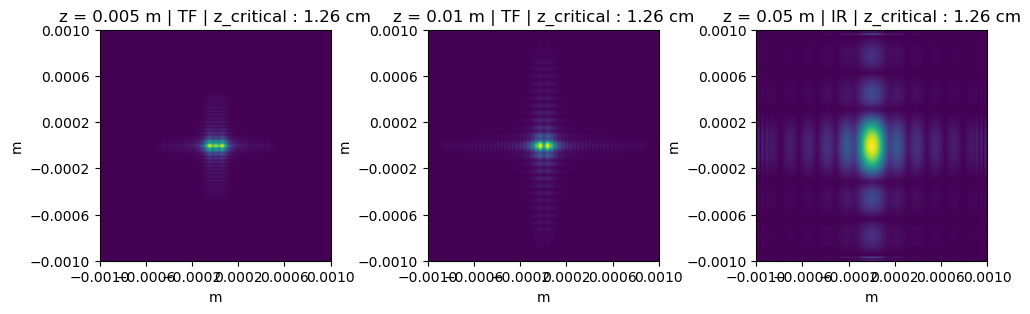

In [76]:
M = 500 # No. samples

# (a)
L1 = 2e-3 # side length (m)
z = [0.005, 0.01, 0.05] # propagation distance

wavelength = 633e-9 # wavelength (m)
w1 = 0.1e-3 # x aperture size, (m)
w2 = 0.05e-3 # y aperture size, (m)
dx1 = L1/M

x = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

for dist in z:
    Nf = FresnelNumber(max(w1, w2), wavelength, dist)
    print(f'z : {dist} (m) | Nf : {Nf}')

u1 = rect(X / (2*w1)) * rect(Y / (2*w2))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

for idx, dist in enumerate(z):
    method = propa_criterion(dx1, wavelength, dist, L1)
    if method=='TF':
        u2 = FresnelpropTF(u1, L1, wavelength, dist) # propagation
    elif method=='IR':
        u2 = FresnelpropIR(u1, L1, wavelength, dist) # propagation

    dist_critical = dx1*L1/wavelength
    I2 = np.abs(u2**2)
    ax[idx].imshow(np.power(I2, 1/2), extent=(-L1/2, L1/2, -L1/2, L1/2))
    ax[idx].set_xlabel('m')
    ax[idx].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx].set_title(f'z = {dist} m | {method} | z_critical : {dist_critical*100:0.2f} cm')
    ax[idx].set_ylabel('m')
plt.show()

z : 0.5 (m) | Nf : 3.15955766192733
z : 2 (m) | Nf : 0.7898894154818324
z : 5 (m) | Nf : 0.31595576619273297
dx : 5e-05 | wavelength : 6.33e-07 | propagation distance : 0.5 | sidelength : 0.025
criterion (norm.) : 0.2532 | cirterion : 1.2659999999999999e-05 
method : TF | sampling TF (H) oversampling, IR (h) undersampling | B1 : 10000.0

dx : 5e-05 | wavelength : 6.33e-07 | propagation distance : 2 | sidelength : 0.025
criterion (norm.) : 1.0128 | cirterion : 5.0639999999999996e-05 
method : IR | sampling TF (H) undersampling, IR (h) oversampling | B1 : 9873.617693522907

dx : 5e-05 | wavelength : 6.33e-07 | propagation distance : 5 | sidelength : 0.025
criterion (norm.) : 2.5319999999999996 | cirterion : 0.0001266 
method : IR | sampling TF (H) undersampling, IR (h) oversampling | B1 : 3949.4470774091633



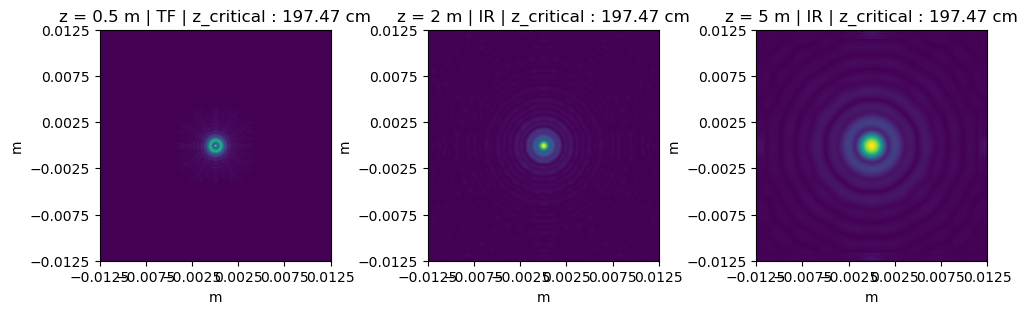

In [81]:
M = 500 # No. samples

# (b)
L1 = 0.025 # side length (m)
z = [0.5, 2, 5] # propagation distance

wavelength = 633e-9 # wavelength (m)
w1 = 1e-3 # x aperture size, (m)
w2 = 0.2e-3 # y aperture size, (m)
dx1 = L1/M

x = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

for dist in z:
    Nf = FresnelNumber(max(w1, w2), wavelength, dist)
    print(f'z : {dist} (m) | Nf : {Nf}')

u1 = circle_func(X, Y, w1) - circle_func(X, Y, w2)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

for idx, dist in enumerate(z):
    method = propa_criterion(dx1, wavelength, dist, L1)
    if method=='TF':
        u2 = FresnelpropTF(u1, L1, wavelength, dist) # propagation
    elif method=='IR':
        u2 = FresnelpropIR(u1, L1, wavelength, dist) # propagation

    dist_critical = dx1*L1/wavelength
    I2 = np.abs(u2**2)
    ax[idx].imshow(np.power(I2, 1/2), extent=(-L1/2, L1/2, -L1/2, L1/2))
    ax[idx].set_xlabel('m')
    ax[idx].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx].set_title(f'z = {dist} m | {method} | z_critical : {dist_critical*100:0.2f} cm')
    ax[idx].set_ylabel('m')
plt.show()

z : 0.5 (m) | Nf : 3.15955766192733
z : 2 (m) | Nf : 0.7898894154818324
z : 5 (m) | Nf : 0.31595576619273297
dx : 5e-05 | wavelength : 6.33e-07 | propagation distance : 0.5 | sidelength : 0.025
criterion (norm.) : 0.2532 | cirterion : 1.2659999999999999e-05 
method : TF | sampling TF (H) oversampling, IR (h) undersampling | B1 : 10000.0

dx : 5e-05 | wavelength : 6.33e-07 | propagation distance : 2 | sidelength : 0.025
criterion (norm.) : 1.0128 | cirterion : 5.0639999999999996e-05 
method : IR | sampling TF (H) undersampling, IR (h) oversampling | B1 : 9873.617693522907

dx : 5e-05 | wavelength : 6.33e-07 | propagation distance : 5 | sidelength : 0.025
criterion (norm.) : 2.5319999999999996 | cirterion : 0.0001266 
method : IR | sampling TF (H) undersampling, IR (h) oversampling | B1 : 3949.4470774091633



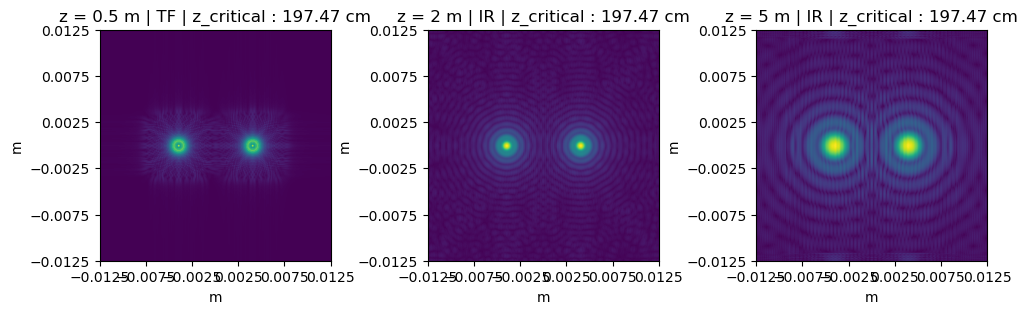

In [84]:
M = 500 # No. samples

# (b)
L1 = 0.025 # side length (m)
z = [0.5, 2, 5] # propagation distance

wavelength = 633e-9 # wavelength (m)
w = 1e-3 # x aperture size, (m)
dx1 = L1/M

x = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

for dist in z:
    Nf = FresnelNumber(w1, wavelength, dist)
    print(f'z : {dist} (m) | Nf : {Nf}')

u1 = circle_func(X-4e-3, Y, w) + circle_func(X+4e-3, Y, w)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
ax = axes.ravel()

for idx, dist in enumerate(z):
    method = propa_criterion(dx1, wavelength, dist, L1)
    if method=='TF':
        u2 = FresnelpropTF(u1, L1, wavelength, dist) # propagation
    elif method=='IR':
        u2 = FresnelpropIR(u1, L1, wavelength, dist) # propagation

    dist_critical = dx1*L1/wavelength
    I2 = np.abs(u2**2)
    ax[idx].imshow(np.power(I2, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
    ax[idx].set_xlabel('m')
    ax[idx].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
    ax[idx].set_title(f'z = {dist} m | {method} | z_critical : {dist_critical*100:0.2f} cm')
    ax[idx].set_ylabel('m')
plt.show()

##### 5.3

In [3]:
# square beam propagation example
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500e-9
k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)
z = 2000        # propagation distance (m)

X1, Y1 = np.meshgrid(x1, y1)
u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
I1 = np.abs(u1**2)                      # source irradiance

u2TF = FresnelpropTF(u1, L1, wavelength, z) # propagation
I2TF = np.abs(u2TF**2)  # observation irradiance

u2IR = FresnelpropIR(u1, L1, wavelength, z) # propagation
I2IR = np.abs(u2IR**2)  # observation irradiance



# power check
print(f'P1 = {np.sum(I1*dx1**2)} | P2TF = {np.sum(I2TF*dx1**2)} | P2IR = {np.sum(I2IR*dx1**2)}')

P1 = 0.010404 | P2TF = 0.010404 | P2IR = 0.010403999999999955


##### 5.4

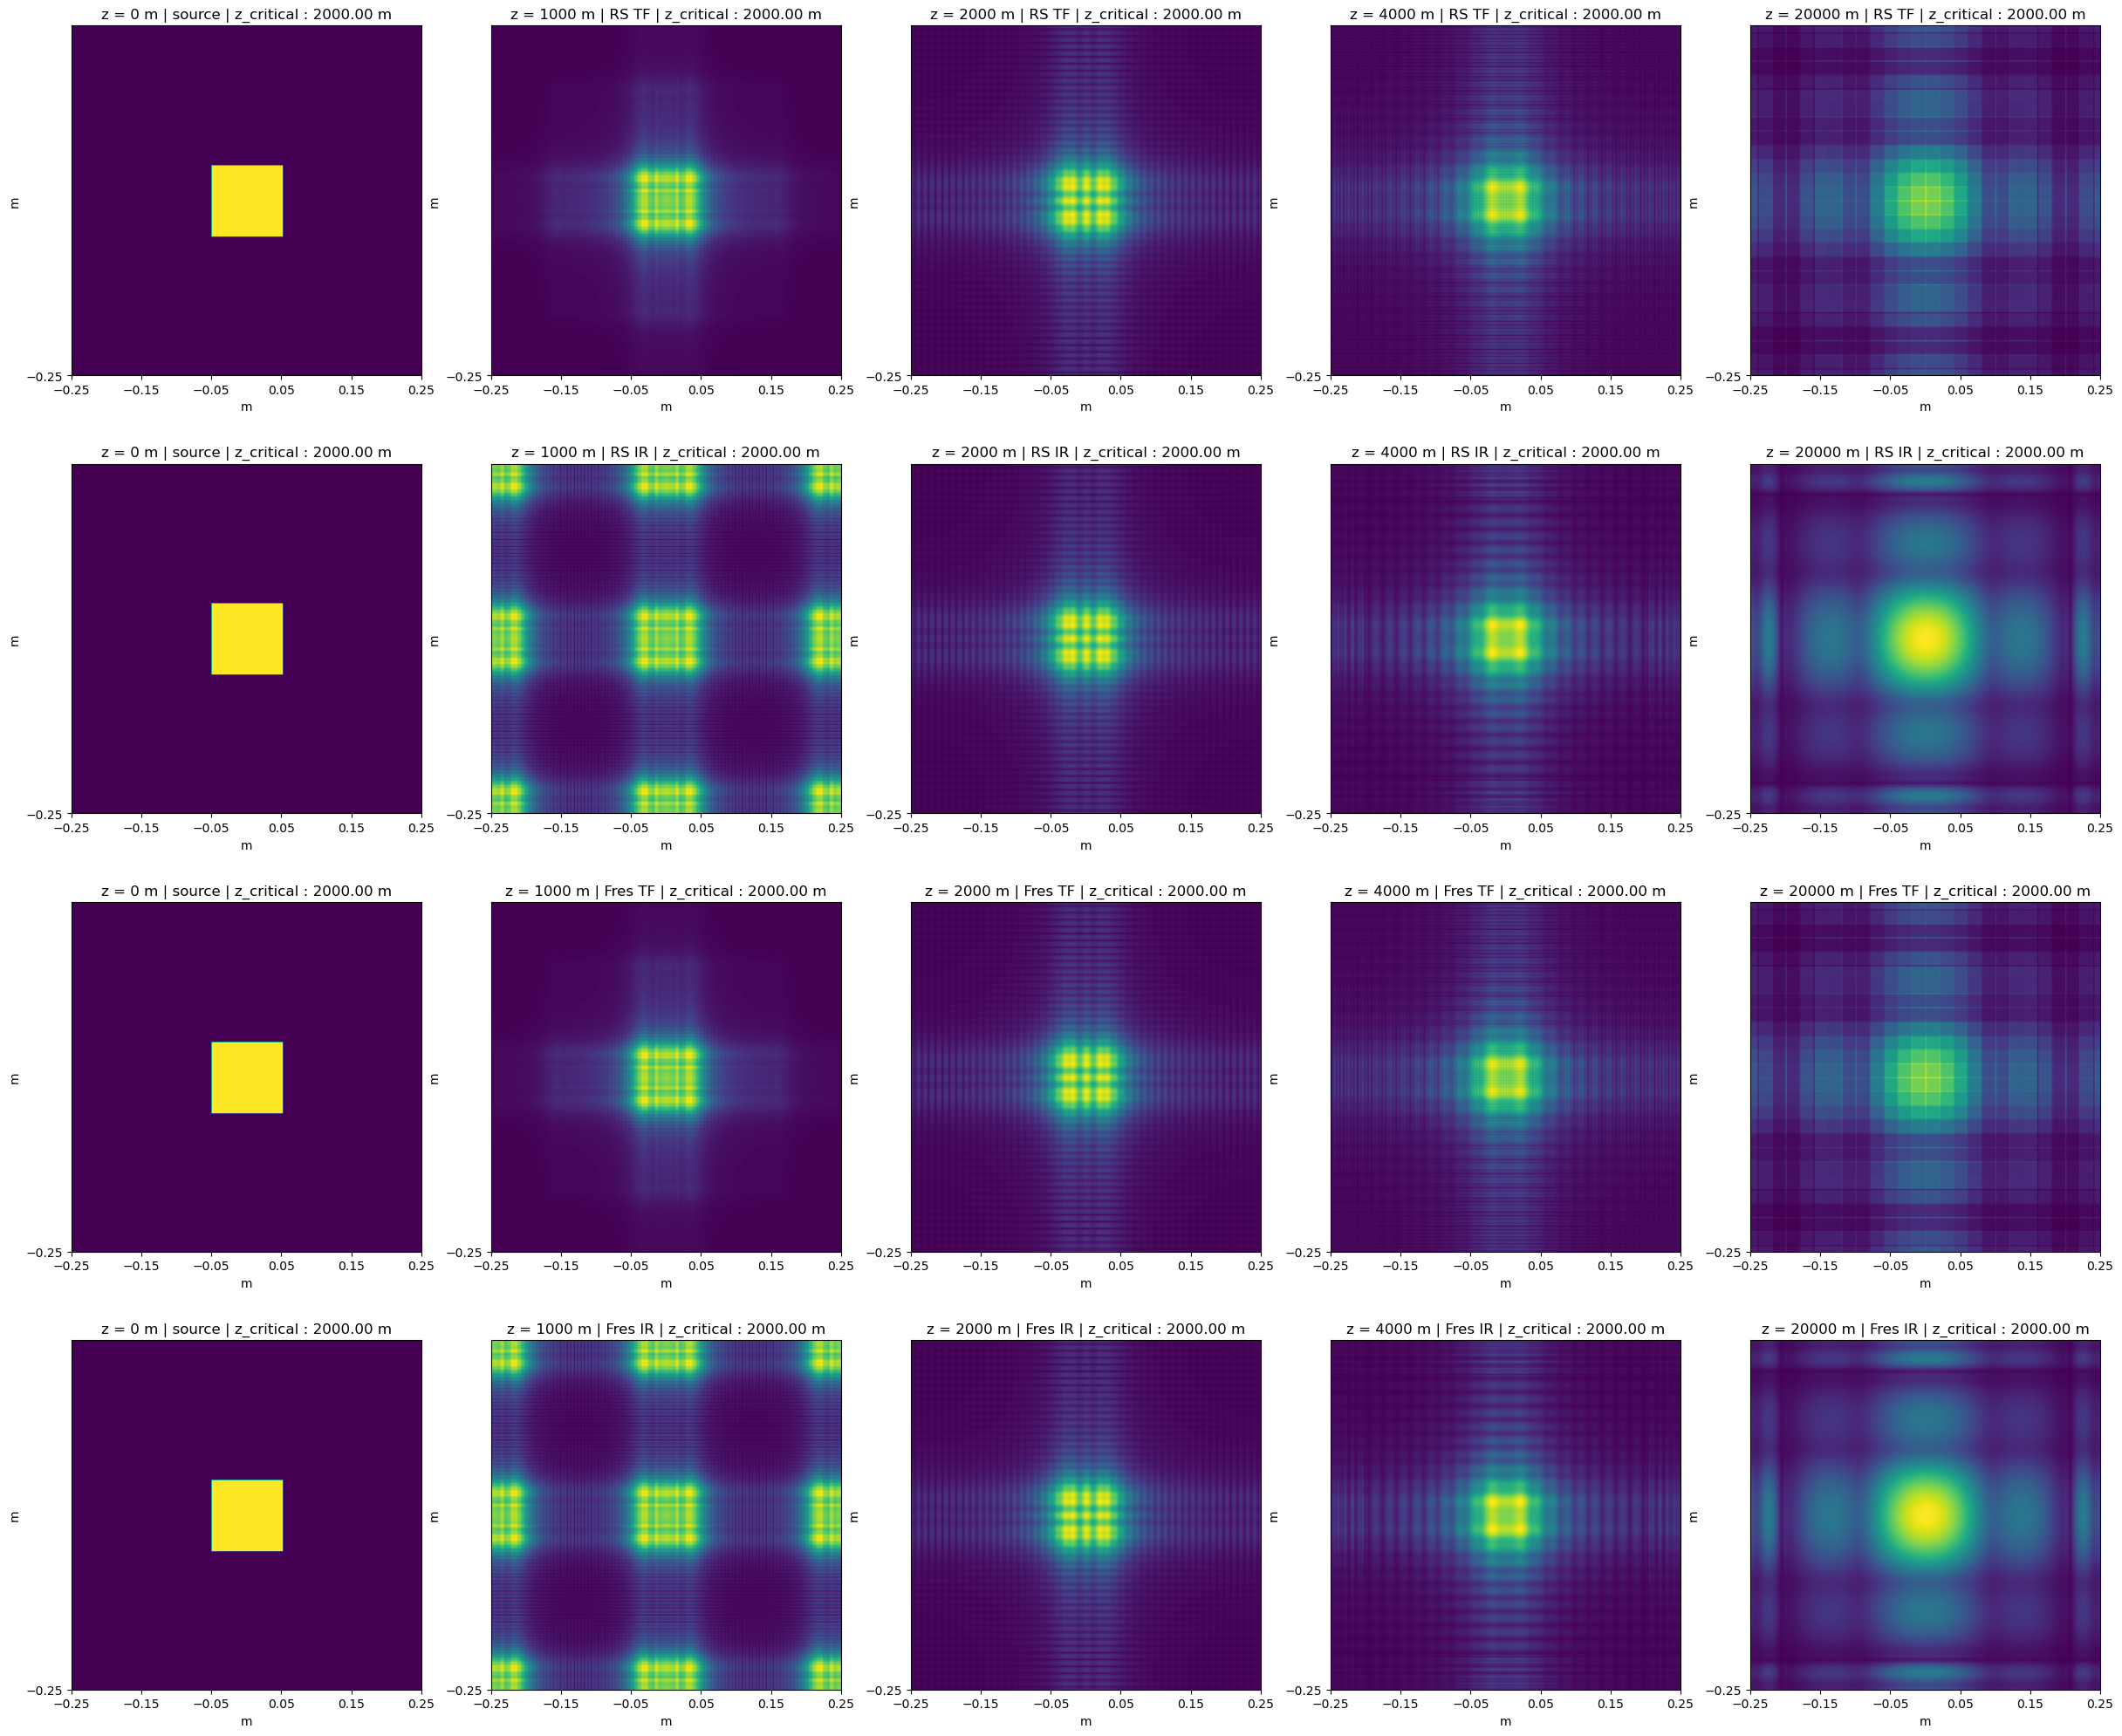

In [18]:
# square beam propagation example
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500e-9
k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)
z = [0, 1000, 2000, 4000, 20000]        # propagation distance (m)

X1, Y1 = np.meshgrid(x1, y1)


u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
I1 = np.abs(u1**2)                      # source irradiance

x2 = x1 # observation coordinates
y2 = y1


fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30, 25))
ax = axes.ravel()


for idx, dist in enumerate(z*4):
    row = idx//5
    if idx in [0, 5, 10, 15]:
        u2 = u1
        method = 'source'
    elif row==0:
        u2 = RSpropTF(u1, L1, wavelength, dist)
        method = 'RS TF'
    elif row==1:
        u2 = RSpropIR(u1, L1, wavelength, dist)
        method = 'RS IR'
    elif row==2:
        u2 = FresnelpropTF(u1, L1, wavelength, dist) # propagation
        method = 'Fres TF'
    elif row==3:
        u2 = FresnelpropIR(u1, L1, wavelength, dist) # propagation
        method = 'Fres IR'

    dist_critical = dx1*L1/wavelength
    I2 = np.abs(u2**2)
    ax[idx].imshow(np.power(I2, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
    ax[idx].set_xlabel('m')
    ax[idx].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
    ax[idx].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
    ax[idx].set_title(f'z = {dist} m | {method} | z_critical : {dist_critical:.2f} m')
    ax[idx].set_ylabel('m')
plt.show()

In [21]:
fres_num = {}
for dist in [1000, 2000, 4000, 20000]:
    fres_num[dist] = FresnelNumber(w, wavelength, dist)
print(fres_num)

{1000: 5.201999999999999, 2000: 2.6009999999999995, 4000: 1.3004999999999998, 20000: 0.26009999999999994}


##### 5.5

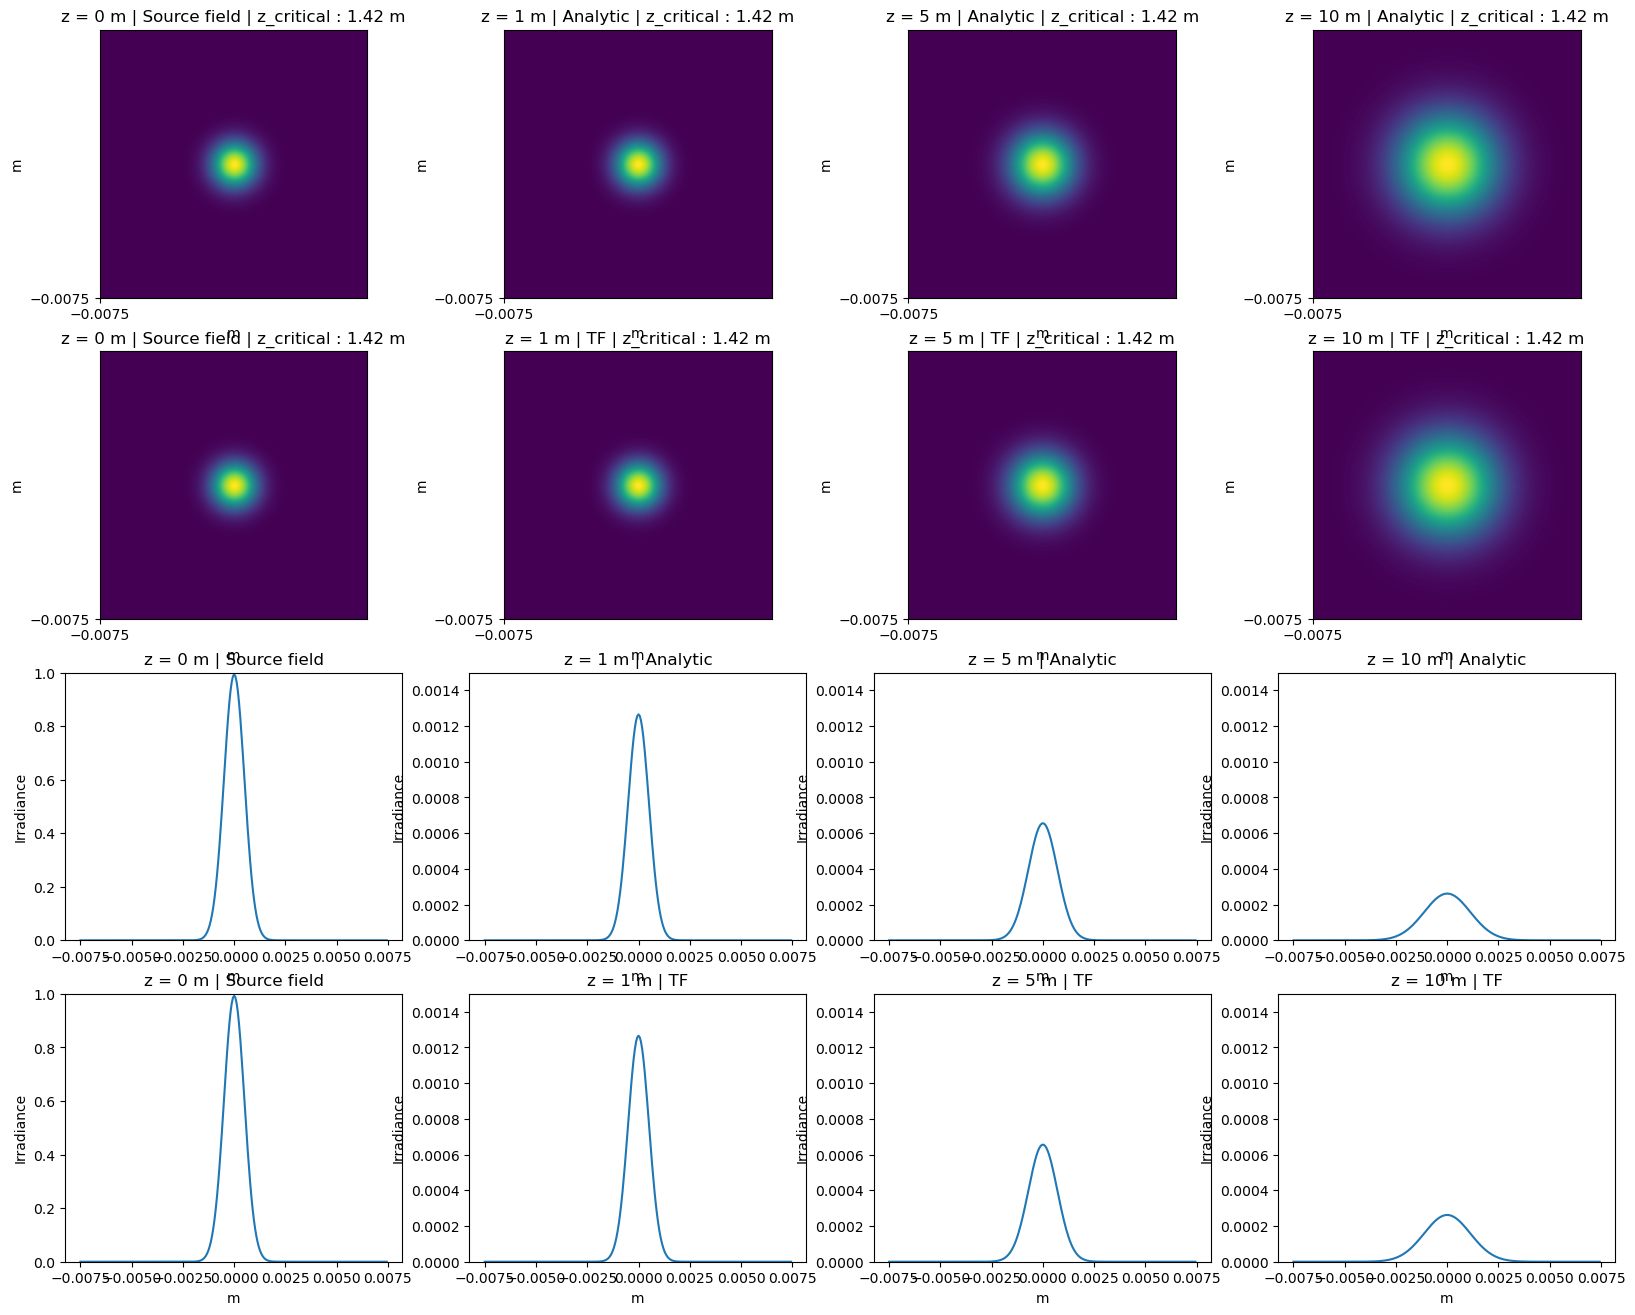

In [79]:
L1 = 15e-3   # side length (m)
M = 250     # No. samples
z = [0, 1, 5, 10] # propagating distance (m)
dx = L1/M    # sample interval (m)
x = np.linspace(-L1/2, L1/2 - dx, num=M, endpoint=True) # sample coordinate

X, Y = np.meshgrid(x, x)

w0 = 1e-3 # source beam e^-2 radius (at z=0) (m)
wavelength = 633e-9 # wavelength (m)
A0 = 1      # V/m
eta = 377   # ohm
I0 = np.abs(A0)**2 / (2*eta)    # source intensity at center W/m^2

u1 = GaussianField(X, Y, A0, w0)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
ax = axes.ravel()

for idx, dist in enumerate(z*2):
    if idx in [0, 4]:
        u2 = u1
        method = 'Source field'
        I2 = np.abs(u2**2)
    elif idx//4==0:
        method = 'Analytic'
        zR = RayleighRange(w0, wavelength)
        wz = GaussianPropRadius(w0, dist, zR)
        I2 = LaserPropIntensity(X, Y, I0, w0, wz)
    elif idx//4==1:
        # method = propa_criterion(dx, wavelength, dist, L)
        # if method=='TF':
        method = 'TF'
        u2 = FresnelpropTF(u1, L1, wavelength, dist) # propagation
        # elif method=='IR':
        #     u2 = FresnelpropIR(u1, L1, wavelength, dist) # propagation
        I2 = np.abs(u2**2) * I0

    dist_critical = dx*L1/wavelength
    
    ax[idx].imshow(np.power(I2, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
    ax[idx].set_xlabel('m')
    ax[idx].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
    ax[idx].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
    ax[idx].set_title(f'z = {dist} m | {method} | z_critical : {dist_critical:.2f} m')
    ax[idx].set_ylabel('m')

for idx, dist in enumerate(z*2):
    idx += 8
    if idx in [8, 12]:
        u2 = u1
        method = 'Source field'
        I2 = np.abs(u2**2)
    elif idx//4==2:
        method = 'Analytic'
        zR = RayleighRange(w0, wavelength)
        wz = GaussianPropRadius(w0, dist, zR)
        I2 = LaserPropIntensity(X, Y, I0, w0, wz)
    elif idx//4==3:
        # method = propa_criterion(dx, wavelength, dist, L)
        # if method=='TF':
        method = 'TF'
        u2 = FresnelpropTF(u1, L, wavelength, dist) # propagation
        I2 = np.abs(u2**2) * I0
        # elif method=='IR':
        #     u2 = FresnelpropIR(u1, L1, wavelength, dist) # propagation

    
    ax[idx].plot(x, I2[int(M/2 - 1), :])
    ax[idx].set_xlabel('m')
    ax[idx].set_title(f'z = {dist} m | {method}')
    ax[idx].set_ylabel('Irradiance')
    if method=='Source field':
        ax[idx].set_ylim([0, 1])
    else:
        ax[idx].set_ylim([0, 1.5e-3])
plt.show()

In [102]:
dist_critical = dx*L1/wavelength

z = 10 # propa distance (m)
zR = RayleighRange(w0=w0, wavelength=wavelength)
wz = GaussianPropRadius(w0=w0, z=z, zR=zR)

Gauss_eff_bandwidth = 0.79 / wz
# src_bandwidth = 1 / (2*dx)
src_bd_lim = L1 / (2*wavelength*z)

print(f'critical dist : {dist_critical:.02f}m')
print(f'Effective bandwidth : {Gauss_eff_bandwidth:.02f} cycles/m')
# print(f'Source bandwidth : {src_bandwidth:.02f} cycles/m')
print(f'Source bandwidth limit : {src_bd_lim:.02f} cycles/m')

critical dist : 1.42m
Effective bandwidth : 351.20 cycles/m
Source bandwidth limit : 1184.83 cycles/m


##### 5.6

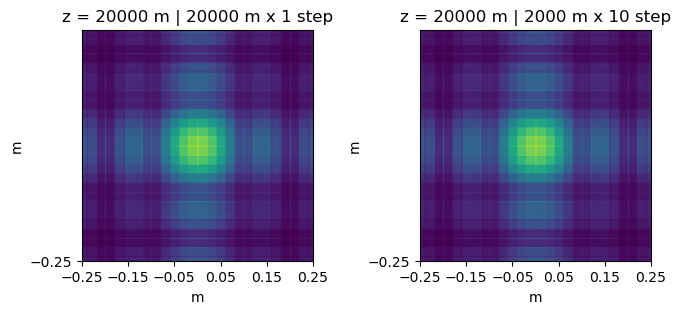

In [5]:
# successive propagation
# square beam propagation example
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500e-9
k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)
z = [2000]*10        # propagation distance (m)

X1, Y1 = np.meshgrid(x1, y1)

u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
I1 = np.abs(u1**2)                      # source irradiance

x2 = x1 # observation coordinates
y2 = y1

u2_onestep = FresnelpropTF(u1=u1, L=L1, wavelength=wavelength, z=20000) # propagation, 20000 m
I2_onestep = np.abs(u2_onestep)**2

u2_tenstep = u1
for i in z:
    u2_tenstep = FresnelpropTF(u1=u2_tenstep, L=L1, wavelength=wavelength, z=i) # propagation, 10 times of 2000m propagation
I2_tenstep = np.abs(u2_tenstep)**2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(np.power(I2_onestep, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
ax[0].set_title(f'z = {20000} m | 20000 m x 1 step')
ax[0].set_ylabel('m')

ax[1].imshow(np.power(I2_tenstep, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[1].set_xlabel('m')
ax[1].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[1].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
ax[1].set_title(f'z = {20000} m | 2000 m x 10 step')
ax[1].set_ylabel('m')
plt.show()

##### 5.7

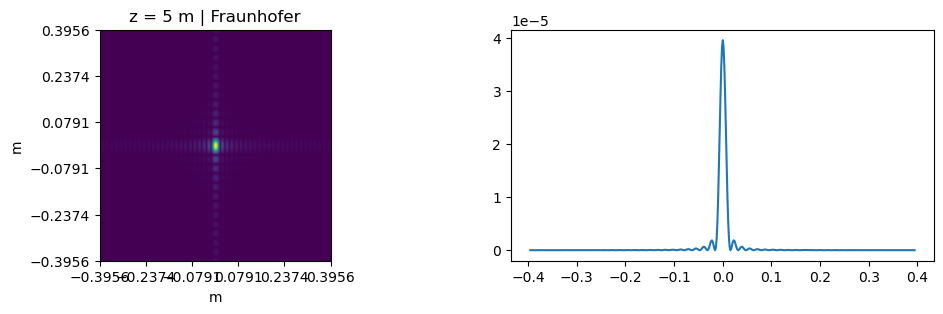

In [11]:
M = 500 # No. samples

# (a)
L1 = 2e-3 # side length (m)
z = 5 # propagation distance (m)

wavelength = 633e-9 # wavelength (m)
w1 = 0.1e-3 # x aperture size, (m)
w2 = 0.05e-3 # y aperture size, (m)
dx1 = L1/M

x = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

u1 = rect(X / (2*w1)) * rect(Y / (2*w2))
u2, L2 = FraunhoferProp(u1=u1, wavelength=wavelength, L1=L1, z=z)
dx2 = wavelength*z/L1
x2 = np.linspace(-L2/2, L2/2-dx2, num=M, endpoint=True)

I2 = np.abs(u2)**2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax = axes.ravel()


ax[0].imshow(np.power(I2, 1/2), extent=(-L2/2, L2/2, -L2/2, L2/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[0].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[0].set_title(f'z = {z} m | Fraunhofer')
ax[0].set_ylabel('m')

ax[1].plot(x2, I2[int(M/2 -1)])
plt.show()

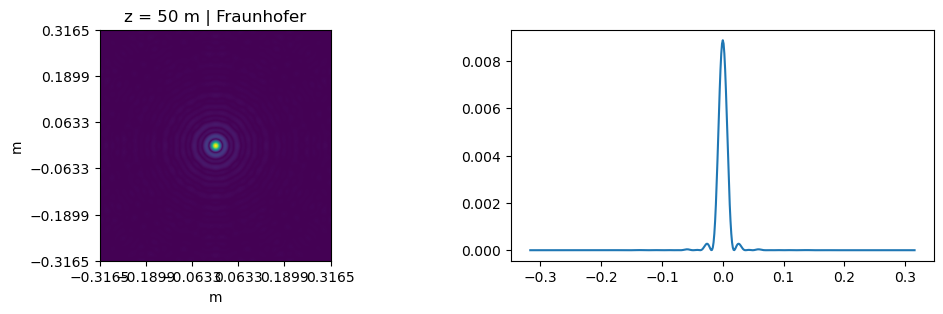

In [13]:
M = 500 # No. samples

# (b)
L1 = 25e-3 # side length (m)
z = 50 # propagation distance (m)

wavelength = 633e-9 # wavelength (m)
w1 = 1e-3 # outter diameter (m)
w2 = 0.2e-3 # inner diameter (m)
dx1 = L1/M

x = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

u1 = circle_func(X, Y, w1) - circle_func(X, Y, w2)

u2, L2 = FraunhoferProp(u1=u1, wavelength=wavelength, L1=L1, z=z)
dx2 = wavelength*z/L1
x2 = np.linspace(-L2/2, L2/2-dx2, num=M, endpoint=True)

I2 = np.abs(u2)**2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax = axes.ravel()


ax[0].imshow(np.power(I2, 1/2), extent=(-L2/2, L2/2, -L2/2, L2/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[0].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[0].set_title(f'z = {z} m | Fraunhofer')
ax[0].set_ylabel('m')

ax[1].plot(x2, I2[int(M/2 -1)])
plt.show()

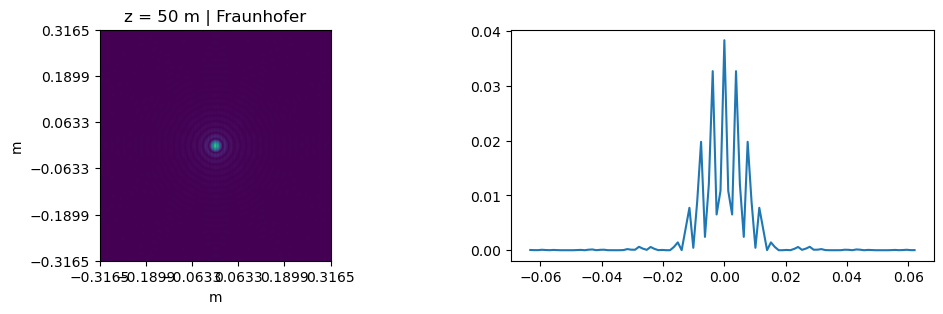

In [16]:
M = 500 # No. samples

# (c)
L1 = 25e-3 # side length (m)
z = 50 # propagation distance (m)

wavelength = 633e-9 # wavelength (m)
w = 1e-3 # x aperture size, (m)
dx1 = L1/M

x = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
y = x
X, Y = np.meshgrid(x, y)

u1 = circle_func(X-4e-3, Y, w) + circle_func(X+4e-3, Y, w)

u2, L2 = FraunhoferProp(u1=u1, wavelength=wavelength, L1=L1, z=z)
dx2 = wavelength*z/L1
x2 = np.linspace(-L2/2, L2/2-dx2, num=M, endpoint=True)

I2 = np.abs(u2)**2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax = axes.ravel()

ax[0].imshow(np.power(I2, 1/2), extent=(-L2/2, L2/2, -L2/2, L2/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[0].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[0].set_title(f'z = {z} m | Fraunhofer')
ax[0].set_ylabel('m')

ax[1].plot(x2[200:300], I2[int(M/2 -1), 200:300])
plt.show()

##### 5.8

In [17]:
# square aperture of width 2w
# effective bandwidth B = 5/w
# Shannon-Nyquist sampling theorem B <= 1/(2*dx)
# 10 <= w/dx
# The number of sample for Fraunhofer approximation is M >> w^2/dx1 (dx1 is sample interval in source plane)
# M >> 100

##### 5.9

dx : 0.002 | wavelength : 5e-07 | propagation distance : 2000 | sidelength : 0.5
criterion (norm.) : 1.0 | cirterion : 0.002 
method : TF | critical sampling | B1 : 250.0



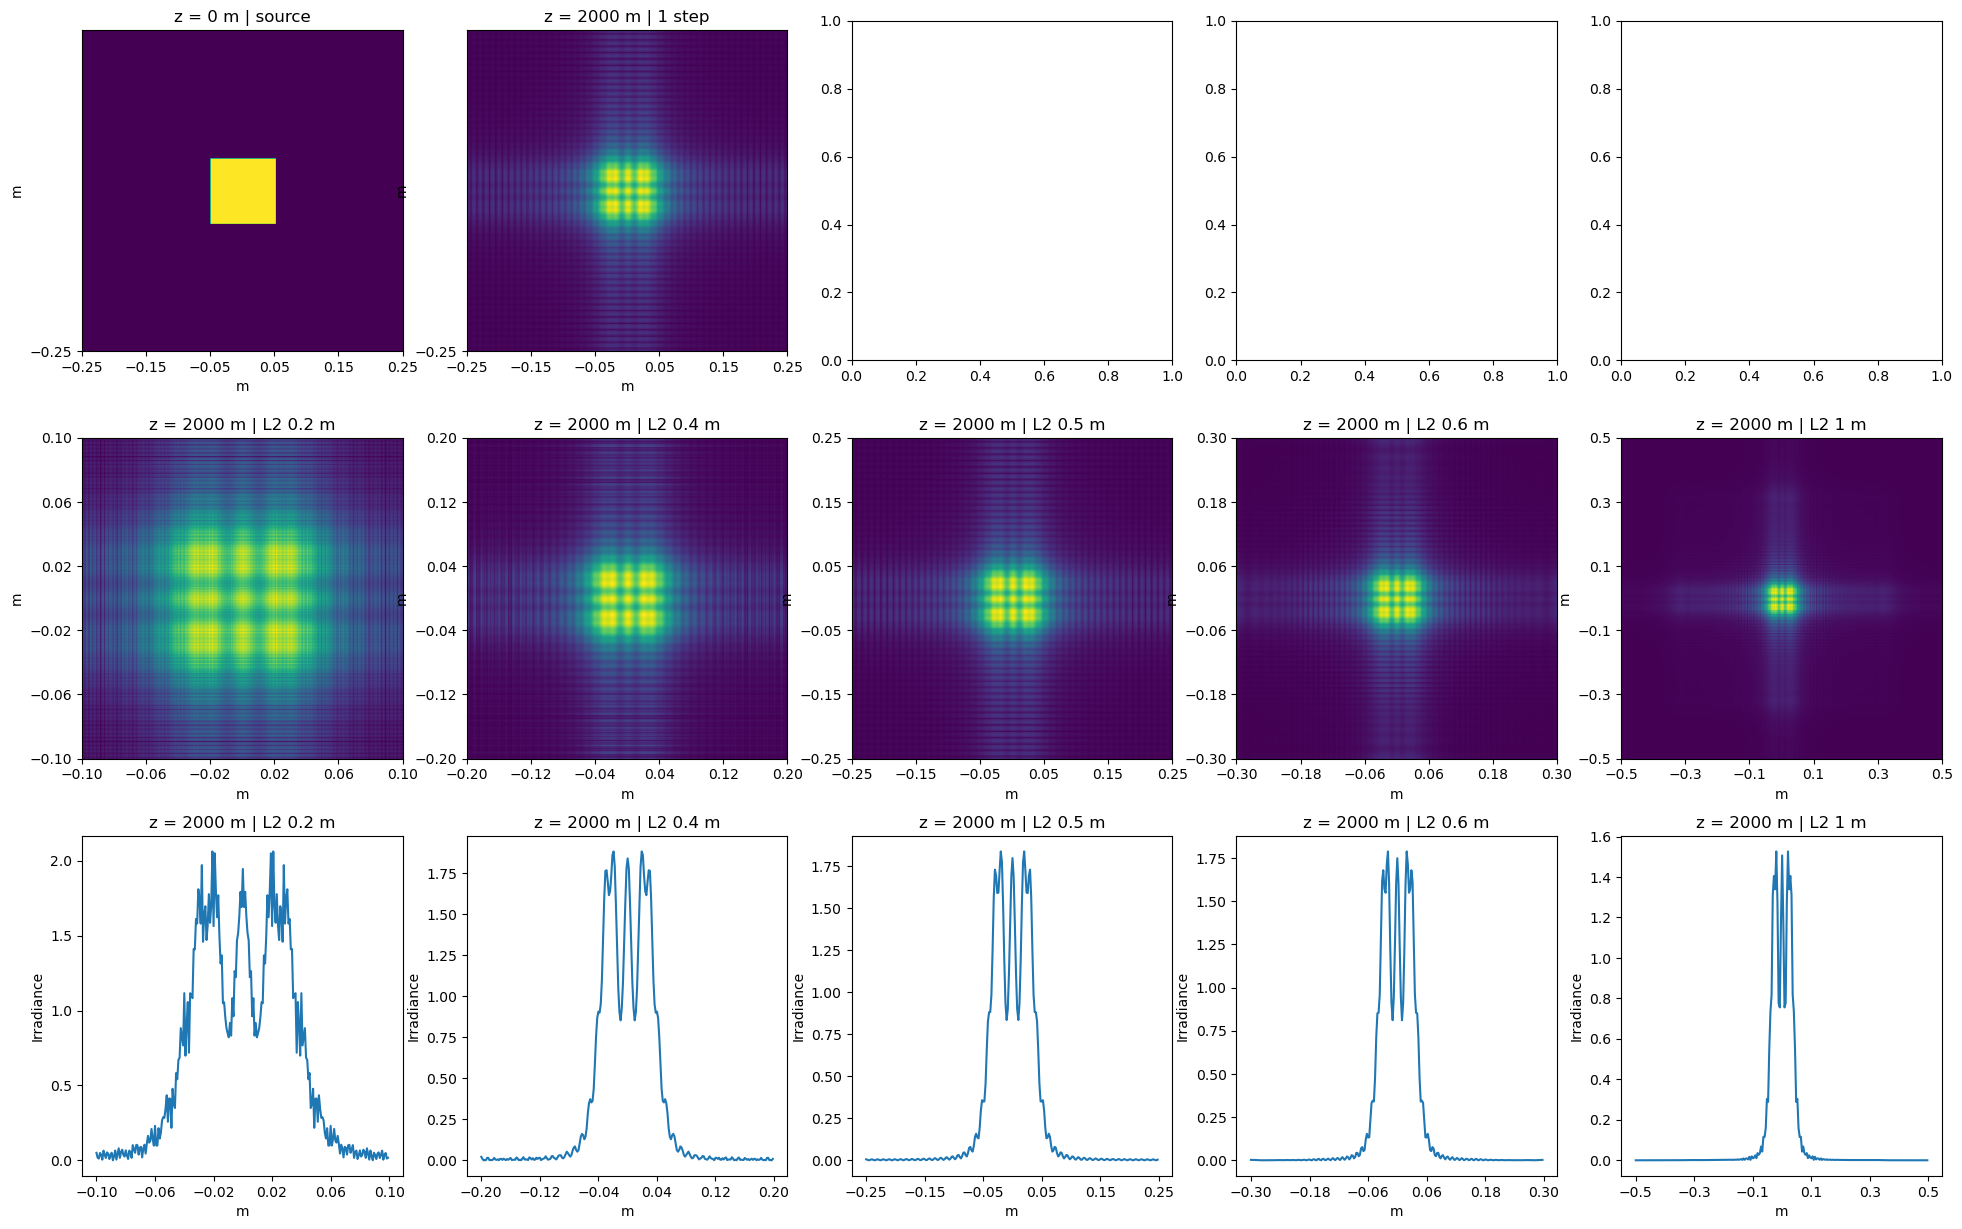

In [25]:
# successive propagation
# square beam propagation example
L1 = 0.5    # side length (m)
M = 250     # No. of samples
z = 2000    # propagation distance (m)
w = 0.051       # source half-width (m)
wavelength = 500e-9 # wavelength (m)
k = 2*np.pi / wavelength    # wavenumber

dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1
X1, Y1 = np.meshgrid(x1, y1)

propa_criterion(dx=dx1, wavelength=wavelength, z=z, L=L1)

u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
I1 = np.abs(u1**2)                      # source irradiance

L2 = [0.2, 0.4, 0.5, 0.6, 1]
x2 = x1 # observation coordinates
y2 = y1

u2_onestep = FresnelpropTF(u1=u1, L=L1, wavelength=wavelength, z=z) # propagation, 20000 m
I2_onestep = np.abs(u2_onestep)**2

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(24, 15))
ax = axes.ravel()

ax[0].imshow(np.power(I1, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
ax[0].set_title(f'z = {0} m | source')
ax[0].set_ylabel('m')

ax[1].imshow(np.power(I2_onestep, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[1].set_xlabel('m')
ax[1].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[1].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
ax[1].set_title(f'z = {z} m | 1 step')
ax[1].set_ylabel('m')

for idx, l2 in enumerate(L2, 5):
    u2_2step, x2, dx2 = prop2step(u1=u1, L1=L1, L2=l2, wavelength=wavelength, z=z) # propagation, 10 times of 2000m propagation
    I2_2step = np.abs(u2_2step)**2

    ax[idx].imshow(np.power(I2_2step, 1/3), extent=(-l2/2, l2/2, -l2/2, l2/2))
    ax[idx].set_xlabel('m')
    ax[idx].set_xticks(np.arange(-l2/2, l2/2+dx2, dx2*50))
    ax[idx].set_yticks(np.arange(-l2/2, l2/2+dx2, dx2*50))
    ax[idx].set_title(f'z = {z} m | L2 {l2} m')
    ax[idx].set_ylabel('m')

    ax[idx+5].plot(x2, I2_2step[int(M/2-1), :])
    ax[idx+5].set_xlabel('m')
    ax[idx+5].set_xticks(np.arange(-l2/2, l2/2+dx2, dx2*50))
    ax[idx+5].set_title(f'z = {z} m | L2 {l2} m')
    ax[idx+5].set_ylabel('Irradiance')


plt.show()

dx : 0.002 | wavelength : 5e-07 | propagation distance : 20000 | sidelength : 0.5
criterion (norm.) : 10.0 | cirterion : 0.02 
method : IR | TF (H) undersampling, IR (h) oversampling | B1 : 25.0



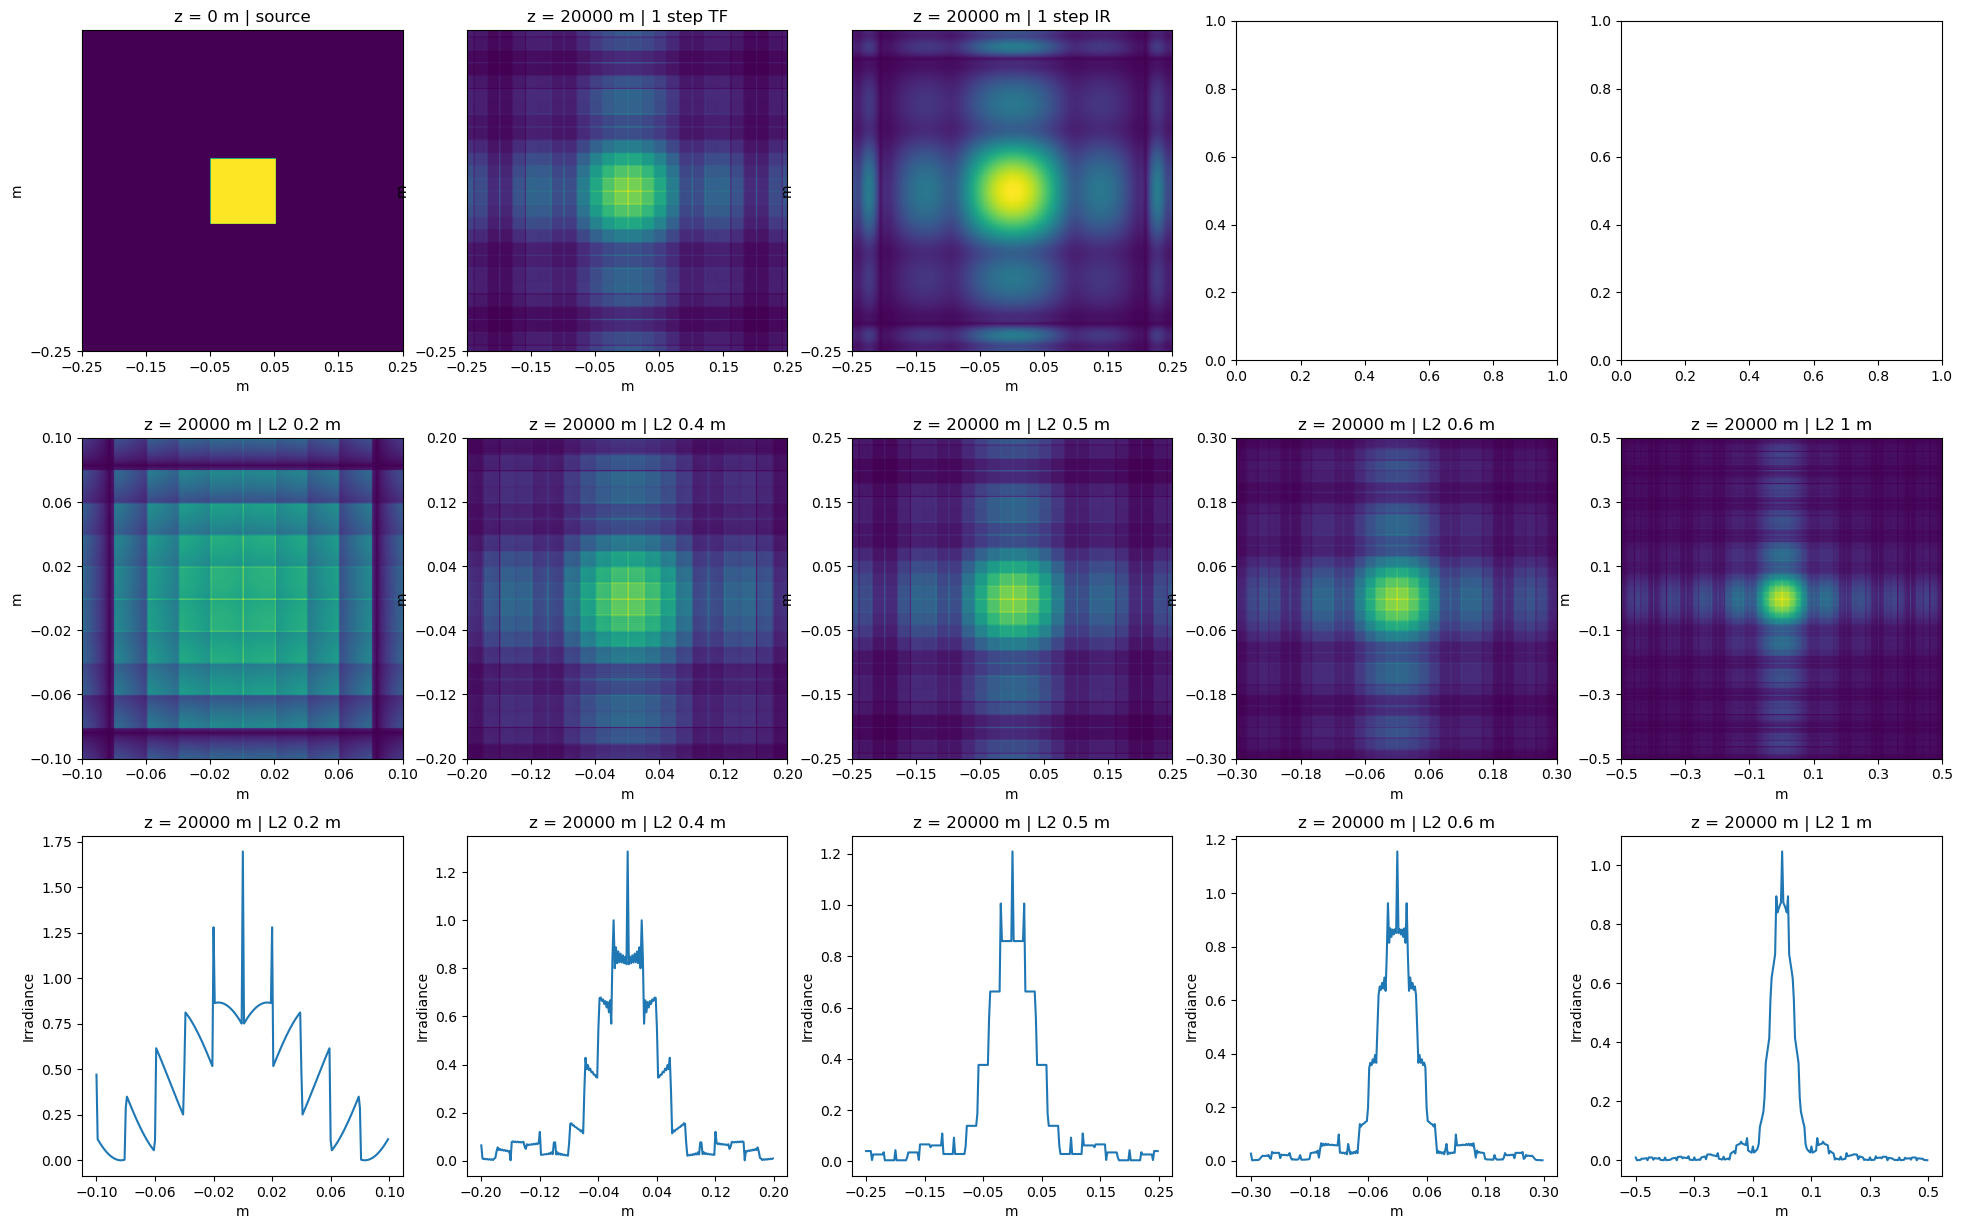

In [30]:
# successive propagation
# square beam propagation example
L1 = 0.5    # side length (m)
M = 250     # No. of samples
z = 20000    # propagation distance (m)
w = 0.051       # source half-width (m)
wavelength = 500e-9 # wavelength (m)
k = 2*np.pi / wavelength    # wavenumber

dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1
X1, Y1 = np.meshgrid(x1, y1)

propa_criterion(dx=dx1, wavelength=wavelength, z=z, L=L1)

u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
I1 = np.abs(u1**2)                      # source irradiance

L2 = [0.2, 0.4, 0.5, 0.6, 1]
x2 = x1 # observation coordinates
y2 = y1

u2_onestepTF = FresnelpropTF(u1=u1, L=L1, wavelength=wavelength, z=z) # propagation, 20000 m
u2_onestepIR = FresnelpropIR(u1=u1, L=L1, wavelength=wavelength, z=z) # propagation, 20000 m
u2_onestepTF = np.abs(u2_onestepTF)**2
u2_onestepIR = np.abs(u2_onestepIR)**2

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(24, 15))
ax = axes.ravel()

ax[0].imshow(np.power(I1, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[0].set_xlabel('m')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
ax[0].set_title(f'z = {0} m | source')
ax[0].set_ylabel('m')

ax[1].imshow(np.power(u2_onestepTF, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[1].set_xlabel('m')
ax[1].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[1].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
ax[1].set_title(f'z = {z} m | 1 step TF')
ax[1].set_ylabel('m')

ax[2].imshow(np.power(u2_onestepIR, 1/3), extent=(-L1/2, L1/2, -L1/2, L1/2))
ax[2].set_xlabel('m')
ax[2].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
ax[2].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*500))
ax[2].set_title(f'z = {z} m | 1 step IR')
ax[2].set_ylabel('m')

for idx, l2 in enumerate(L2, 5):
    u2_2step, x2, dx2 = prop2step(u1=u1, L1=L1, L2=l2, wavelength=wavelength, z=z) # propagation, 10 times of 2000m propagation
    I2_2step = np.abs(u2_2step)**2

    ax[idx].imshow(np.power(I2_2step, 1/3), extent=(-l2/2, l2/2, -l2/2, l2/2))
    ax[idx].set_xlabel('m')
    ax[idx].set_xticks(np.arange(-l2/2, l2/2+dx2, dx2*50))
    ax[idx].set_yticks(np.arange(-l2/2, l2/2+dx2, dx2*50))
    ax[idx].set_title(f'z = {z} m | L2 {l2} m')
    ax[idx].set_ylabel('m')

    ax[idx+5].plot(x2, I2_2step[int(M/2-1), :])
    ax[idx+5].set_xlabel('m')
    ax[idx+5].set_xticks(np.arange(-l2/2, l2/2+dx2, dx2*50))
    ax[idx+5].set_title(f'z = {z} m | L2 {l2} m')
    ax[idx+5].set_ylabel('Irradiance')


plt.show()

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as sg
t = np.linspace(0, 5, 100, endpoint=True)
x = t
y = (t-2.5)**2
s = np.cumsum(np.sqrt(np.gradient(y)**2 + np.gradient(t)**2))

dt = np.gradient(t)
ds = np.gradient(s)
dy = np.gradient(y)
dx = np.gradient(x)

dtds = dt/ds
dxdt = dx/dt
dydt = dy/dt

dx2dt2 = np.gradient(dxdt) / dt
dy2dt2 = np.gradient(dydt) / dt

kk = np.abs(dy2dt2) / (1 + dydt**2)**(3/2)

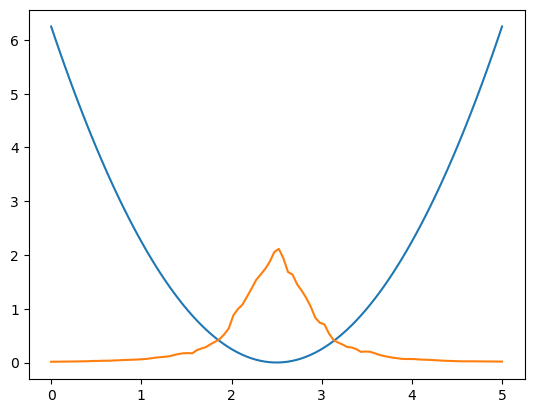

In [181]:
plt.plot(t, y)
plt.plot(t, k)

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as sg
t = np.linspace(0, 5, 100, endpoint=True)
x = t
y = (t-2.5)**2 + np.random.randn(100)*0.01
s = np.cumsum(np.sqrt(np.gradient(y)**2 + np.gradient(t)**2))

dt = np.gradient(t)
ds = np.gradient(s)
dydt = sg(x=y, window_length=11, polyorder=3, deriv=1, delta=np.mean(dt), mode='interp')
dx = np.gradient(x)

dtds = dt/ds
dxdt = dx/dt
# dydt = dy/dt

dx2dt2 = np.gradient(dxdt) / dt
dy2dt2 = sg(x=y, window_length=11, polyorder=3, deriv=2, delta=np.mean(dt), mode='interp') 

k = np.abs(dy2dt2) / (1 + dydt**2)**(3/2)
kf = sg(x=k, window_length=11, polyorder=3, deriv=0, delta=np.mean(dt), mode='interp') 

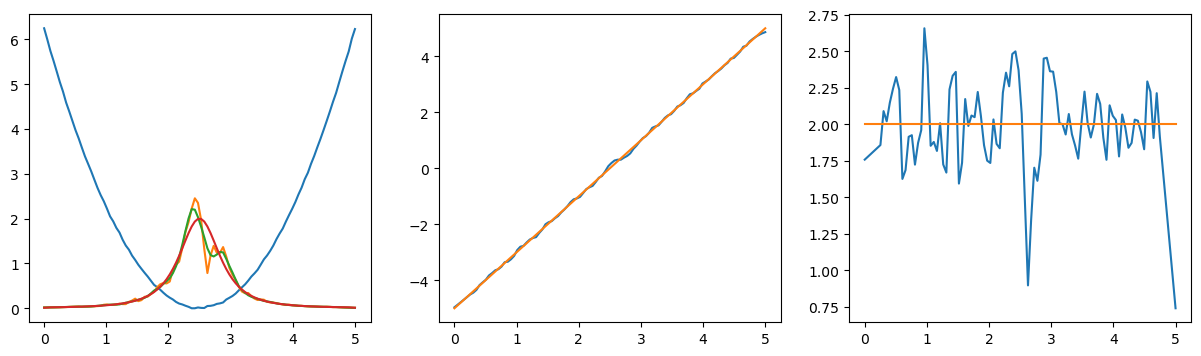

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax = ax.ravel()

ax[0].plot(t, y)
ax[0].plot(t, k)
ax[0].plot(t, kf)
ax[0].plot(t, kk)

ax[1].plot(t, dydt)
ax[1].plot(t, 2*(t-2.5))

ax[2].plot(t, dy2dt2)
ax[2].plot(t, np.ones_like(t)*2)


In [208]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as sg
t = np.linspace(0, 5, 100, endpoint=True)
x = t
y = (t-2.5)**2 + np.random.randn(100)*0.01
s = np.cumsum(np.sqrt(np.gradient(y)**2 + np.gradient(t)**2))

dt = np.gradient(t)
ds = np.gradient(s) 
ds = sg(x=s, window_length=11, polyorder=3, deriv=1, delta=1, mode='interp') 
dx = np.gradient(x)

dtds = dt/ds
dxdt = dx/dt
dydt = dy/dt

dxds = dxdt*dtds
dyds = dydt*dtds

dx2ds2 = np.gradient(dxds)/dt * dtds
dy2ds2 = np.gradient(dyds)/dt * dtds

k = np.sqrt(dx2ds2**2 + dy2ds2**2)

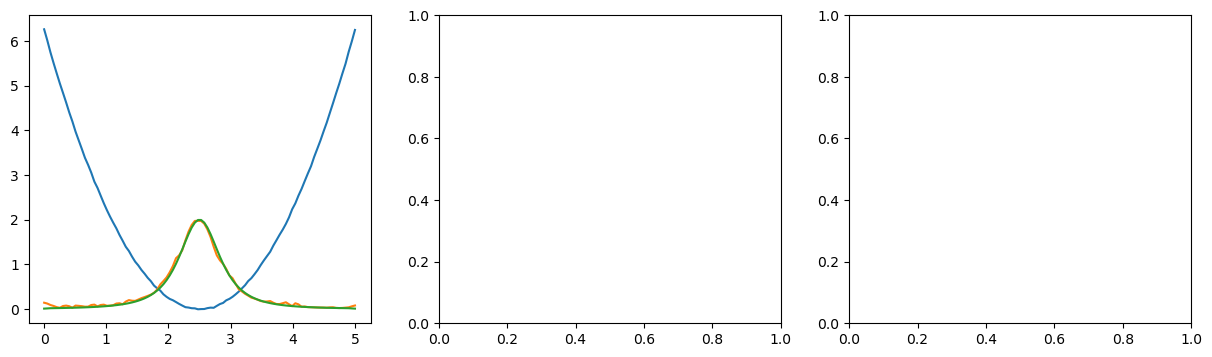

In [211]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax = ax.ravel()

ax[0].plot(t, y)
ax[0].plot(t, k)
ax[0].plot(t, kk)